In [1]:
#import packages
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import data sets
df = pd.read_excel('Venue Utilization.xlsx')
df.describe(include="all")

,Adjusted Time,Meal,Day of the Month,Concatenate,Actual Date,Day of the Week,# Guests,Table Type,Location
count,10313,10313,10313.000000,1.031300e+04,10313,10313,10313.000000,10313,10313
unique,18,4,NaN,NaN,NaN,7,NaN,5,3
top,18:00 - 18:59,Dinner,NaN,NaN,NaN,Thursday,NaN,Cashier,OLG
freq,924,4347,NaN,NaN,NaN,1831,NaN,5659,6567
mean,NaN,NaN,15.733637,2.024061e+07,2024-06-14 08:01:51.703674880,NaN,31.037525,NaN,NaN
min,NaN,NaN,1.000000,2.024010e+07,2024-01-01 00:00:00,NaN,0.000000,NaN,NaN
25%,NaN,NaN,8.000000,2.024032e+07,2024-03-21 00:00:00,NaN,4.000000,NaN,NaN
50%,NaN,NaN,16.000000,2.024061e+07,2024-06-14 00:00:00,NaN,16.000000,NaN,NaN
75%,NaN,NaN,23.000000,2.024091e+07,2024-09-06 00:00:00,NaN,32.000000,NaN,NaN
max,NaN,NaN,31.000000,2.024113e+07,2024-11-30 00:00:00,NaN,500.000000,NaN,NaN


In [3]:
df

,Adjusted Time,Meal,Day of the Month,Concatenate,Actual Date,Day of the Week,# Guests,Table Type,Location
0,06:00 - 06:59,Breakfast,1,20240101,2024-01-01,Monday,1,Tab,OLG
1,07:00 - 07:59,Breakfast,1,20240101,2024-01-01,Monday,1,Cashier,OLG
2,07:00 - 07:59,Breakfast,1,20240101,2024-01-01,Monday,1,Tab,OLG
3,07:00 - 07:59,Breakfast,1,20240101,2024-01-01,Monday,2,---,OLG
4,08:00 - 08:59,Breakfast,1,20240101,2024-01-01,Monday,16,Cashier,OLG
...,...,...,...,...,...,...,...,...,...
10308,17:00 - 17:59,Dinner,30,20241130,2024-11-30,Saturday,14,Cashier,Lola's
10309,18:00 - 18:59,Dinner,30,20241130,2024-11-30,Saturday,12,Cashier,Lola's
10310,19:00 - 19:59,Dinner,30,20241130,2024-11-30,Saturday,2,Cashier,Lola's
10311,20:00 - 20:59,Dinner,30,20241130,2024-11-30,Saturday,0,Cashier,Lola's


In [4]:
df['Meal'].unique()

array(['Breakfast', 'Lunch', 'Dinner', 'Exclude'], dtype=object)

In [5]:
df['Table Type'].unique()

array(['Tab', 'Cashier', '---', 'Table', 'Quick Drinks'], dtype=object)

In [6]:
# Remove rows where 'Meal' is 'Exclude' and 'Table Type' is '---' or 'Tab'
df_cleaned = df[df["Meal"] != "Exclude"]

df_cleaned = df[df["Table Type"].isin(["Cashier", "Table", "Quick Drinks"])]

In [7]:
df_cleaned['Meal'].unique()

array(['Breakfast', 'Lunch', 'Dinner'], dtype=object)

In [8]:
df_cleaned['Table Type'].unique()

array(['Cashier', 'Table', 'Quick Drinks'], dtype=object)

In [9]:
df_cleaned.set_index('Actual Date', inplace=True)

In [10]:
df_cleaned['Month'] = df_cleaned.index.month

<ipython-input-10-376b81f8bc4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned.index.month


In [11]:
df_cleaned.head()

,Adjusted Time,Meal,Day of the Month,Concatenate,Day of the Week,# Guests,Table Type,Location,Month
Actual Date,,,,,,,,,
2024-01-01,07:00 - 07:59,Breakfast,1,20240101,Monday,1,Cashier,OLG,1
2024-01-01,08:00 - 08:59,Breakfast,1,20240101,Monday,16,Cashier,OLG,1
2024-01-01,09:00 - 09:59,Breakfast,1,20240101,Monday,5,Cashier,OLG,1
2024-01-01,10:00 - 10:59,Lunch,1,20240101,Monday,26,Cashier,OLG,1
2024-01-01,11:00 - 11:59,Lunch,1,20240101,Monday,45,Cashier,OLG,1


In [12]:
df_cleaned.tail()

,Adjusted Time,Meal,Day of the Month,Concatenate,Day of the Week,# Guests,Table Type,Location,Month
Actual Date,,,,,,,,,
2024-11-30,16:00 - 16:59,Dinner,30,20241130,Saturday,1,Cashier,Lola's,11
2024-11-30,17:00 - 17:59,Dinner,30,20241130,Saturday,14,Cashier,Lola's,11
2024-11-30,18:00 - 18:59,Dinner,30,20241130,Saturday,12,Cashier,Lola's,11
2024-11-30,19:00 - 19:59,Dinner,30,20241130,Saturday,2,Cashier,Lola's,11
2024-11-30,20:00 - 20:59,Dinner,30,20241130,Saturday,0,Cashier,Lola's,11


In [13]:
# Encode categorical variables
label_encoders = {}
for column in ['Meal', 'Day of the Week', 'Table Type', 'Location', 'Adjusted Time']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

# Prepare features and target variable
X = df_cleaned[['Day of the Week', 'Adjusted Time', 'Location', 'Month', 'Day of the Month']]
y = df_cleaned['# Guests']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-13-225a69094911>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])
<ipython-input-13-225a69094911>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])
<ipython-input-13-225a69094911>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [14]:
df_cleaned

,Adjusted Time,Meal,Day of the Month,Concatenate,Day of the Week,# Guests,Table Type,Location,Month
Actual Date,,,,,,,,,
2024-01-01,1,0,1,20240101,1,1,0,1,1
2024-01-01,2,0,1,20240101,1,16,0,1,1
2024-01-01,3,0,1,20240101,1,5,0,1,1
2024-01-01,4,2,1,20240101,1,26,0,1,1
2024-01-01,5,2,1,20240101,1,45,0,1,1
...,...,...,...,...,...,...,...,...,...
2024-11-30,10,1,30,20241130,2,1,0,0,11
2024-11-30,11,1,30,20241130,2,14,0,0,11
2024-11-30,12,1,30,20241130,2,12,0,0,11


In [15]:
df_cleaned.describe(include="all")

,Adjusted Time,Meal,Day of the Month,Concatenate,Day of the Week,# Guests,Table Type,Location,Month
count,6669.000000,6669.000000,6669.000000,6.669000e+03,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000
mean,8.647173,1.207078,15.735043,2.024061e+07,3.233618,21.522717,0.302444,1.063278,5.926826
std,3.722062,0.636218,8.811265,3.171841e+02,2.099434,19.399812,0.716270,0.657577,3.168586
min,0.000000,0.000000,1.000000,2.024010e+07,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,1.000000,8.000000,2.024032e+07,1.000000,6.000000,0.000000,1.000000,3.000000
50%,9.000000,1.000000,16.000000,2.024061e+07,4.000000,16.000000,0.000000,1.000000,6.000000
75%,12.000000,2.000000,23.000000,2.024090e+07,5.000000,32.000000,0.000000,1.000000,9.000000
max,15.000000,2.000000,31.000000,2.024113e+07,6.000000,200.000000,2.000000,2.000000,11.000000


In [16]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 107.96997034764665
R² Score: 0.7180952121111108


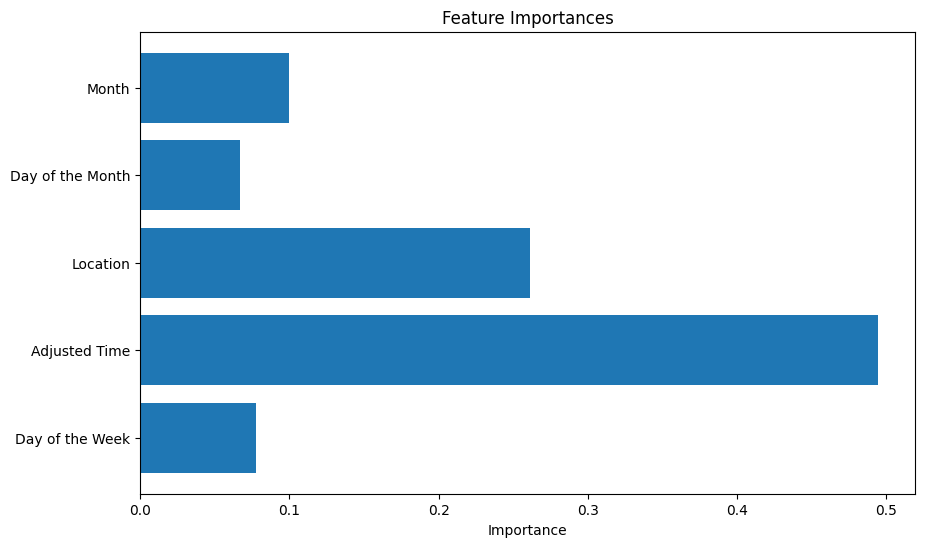

In [17]:
# Visualize feature importances
importances = model.feature_importances_
features = ['Day of the Week', 'Adjusted Time', 'Location', 'Day of the Month', 'Month']
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

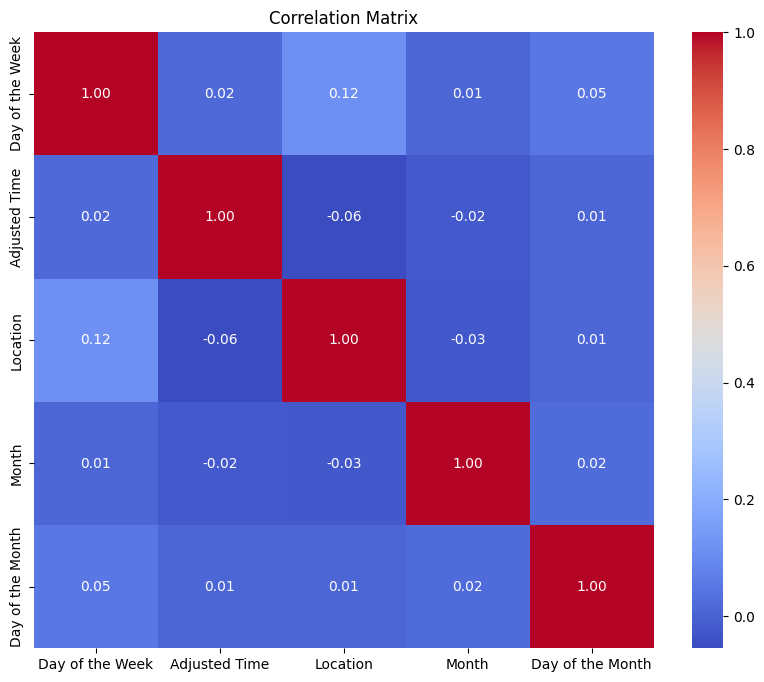

In [18]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF
vif_data = calculate_vif(pd.DataFrame(X, columns=['Day of the Week', 'Adjusted Time', 'Location', 'Day of the Month', 'Month']))
print(vif_data)

            Feature       VIF
0   Day of the Week  3.149095
1     Adjusted Time  4.300162
2          Location  3.126970
3  Day of the Month  3.562705
4             Month  3.572603


A VIF value greater than 10 (some use 5 as a threshold) indicates high multicollinearity.